In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json as json
import plotly.express as px
import plotly.colors as colors

In [15]:
JP = pd.read_csv("JP_youtube_trending_data.csv")
JP

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description
0,UYXa8R9vvzA,皆からの色々な質問に何も隠さず答える！びっくりさせたらごめん笑,2020-08-11T10:00:06Z,UCZCzstgLGQdK8GSztJHh0-w,タナカガ,22,2020-08-12T00:00:00Z,[None],778499,34811,667,3939,https://i.ytimg.com/vi/UYXa8R9vvzA/default.jpg,False,False,登録者数30万人ありがとうございます！！！ご機嫌ようみなさま。お久しぶりでございます。なんか...
1,02MaoZ5n-uM,【異次元】世界に伝えたい『This is ギータ』【変態打ち】,2020-08-11T13:36:28Z,UC0v-pxTo1XamIDE-f__Ad0Q,(パーソル パ・リーグTV公式)PacificLeagueTV,17,2020-08-12T00:00:00Z,パーソルパリーグTV|パリーグTV|パシフィックリーグ|Pacificleague|プロ野球,1161952,18514,259,4115,https://i.ytimg.com/vi/02MaoZ5n-uM/default.jpg,False,False,言葉が出ない。スゴすぎて、異次元過ぎて、言葉が出ない。左対左、だけど何となく打ちそうな気はし...
2,ucDDYszgj5c,【親心】てつやを一番よく知るのは誰？第１回てつやの母親に聞くてつや王！,2020-08-11T12:00:11Z,UCutJqz56653xV2wwSvut_hQ,東海オンエア,23,2020-08-12T00:00:00Z,[None],1980557,63961,692,6216,https://i.ytimg.com/vi/ucDDYszgj5c/default.jpg,False,False,それにしても実家に帰ってません。あまりにいつでも帰れるので逆にタイミングが難しくなってます。...
3,M9Pmf9AB4Mo,Apex Legends | Stories from the Outlands – “Th...,2020-08-11T17:00:10Z,UC0ZV6M2THA81QT9hrVWJG3A,Apex Legends,20,2020-08-12T00:00:00Z,Apex Legends|Apex Legends characters|new Apex ...,2381688,146742,2794,16557,https://i.ytimg.com/vi/M9Pmf9AB4Mo/default.jpg,False,False,"While running her own modding shop, Ramya Pare..."
4,tkaU_Ctzhes,映画『銀魂 THE FINAL』特報 2021年1月8日(金)公開,2020-08-11T23:00:00Z,UCSrwpEM8lBM4jR5YoKX3XOQ,ワーナー ブラザース 公式チャンネル,1,2020-08-12T00:00:00Z,銀魂|gintama|劇場版|空知英秋|杉田智和|釘宮理恵|阪口大助|アニメ|anime|週...,442524,14388,73,1420,https://i.ytimg.com/vi/tkaU_Ctzhes/default.jpg,False,False,「銀魂」本当のラスト!最後のバカ騒ぎが、始まる!笑いも涙も宇宙規模で限界突破！『銀魂 THE...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203975,AAf9b8hr_xs,【大谷翔平 投手では7回5失点で5勝目 打者では特大弾含む4安打！】5.16 エンゼルス V...,2023-05-16T02:00:52Z,UCJ-l-sMQFHogSy8KXRyMIRA,SPOTVNOW,17,2023-05-24T00:00:00Z,MLB|メジャーリーグ|EPL|プレミアリーグ|SPFL|スコティッシュプレミアシップ|三笘...,759593,3855,0,696,https://i.ytimg.com/vi/AAf9b8hr_xs/default.jpg,False,False,【エンゼルス9－5オリオールズ】＠オリオール・パーク・アット・カムデンヤーズ エンゼルスは今...
203976,eEC0Ru3H8bo,MAZZEL / Vivid -Dance Practice Fix ver.-,2023-05-15T12:00:33Z,UCMF_5h2OejEhVorTB02UUSg,MAZZEL,24,2023-05-24T00:00:00Z,MAZZEL|マーゼル|BMSG|Vivid|Dance Practice,386083,17256,0,1099,https://i.ytimg.com/vi/eEC0Ru3H8bo/default.jpg,False,False,2023.05.17 ReleaseDebut Single Vivid by MAZZEL...
203977,qeHzi2ydHwg,『I'm a mess』 acoustic ver. 優里×Hiro【MY FIRST ST...,2023-05-13T10:00:38Z,UC7MvTslTWkE1HKNYkXiGv1Q,優里ちゃんねる【公式】,22,2023-05-24T00:00:00Z,[None],1276553,37879,0,1094,https://i.ytimg.com/vi/qeHzi2ydHwg/default.jpg,False,False,『I'm a mess』のサブスク、DL配信はこちらhttps://zula.lnk.to/...
203978,GjHv12dU8yM,上沼恵美子が作る魔法の焼きそば【あるものを１つ足すだけで劇的な進化を遂げるソース焼きそば】,2023-05-14T03:30:11Z,UCxuuuG_hArKRyRWQaBhznPA,上沼恵美子ちゃんねる,24,2023-05-24T00:00:00Z,上沼恵美子|上沼恵美子ちゃんねる|焼きそば|料理|簡単メニュー|白浜,423535,8587,0,493,https://i.ytimg.com/vi/GjHv12dU8yM/default.jpg,False,False,「焼きそばでええわ」「焼きそばくらいしかできないけどいい？」これまで多くの人たちに長年愛され...


In [16]:
# Load the JSON file containing category information
with open('JP_category_id.json') as jp_file:
    jp_json = json.load(jp_file)

# Extract the category numbers and names from the JSON
categoryNum = []
for category in jp_json['items']:
    categoryNum.append(category['id'])

categoryNames = []
for category in jp_json['items']:
    categoryNames.append(category['snippet']['title'])

# Create a dictionary mapping category numbers to category names
categoryDict = {categoryNum[i]: categoryNames[i] for i in range(len(categoryNum))}

# Print the category dictionary
categoryDict


{'1': 'Film & Animation',
 '2': 'Autos & Vehicles',
 '10': 'Music',
 '15': 'Pets & Animals',
 '17': 'Sports',
 '18': 'Short Movies',
 '19': 'Travel & Events',
 '20': 'Gaming',
 '21': 'Videoblogging',
 '22': 'People & Blogs',
 '23': 'Comedy',
 '24': 'Entertainment',
 '25': 'News & Politics',
 '26': 'Howto & Style',
 '27': 'Education',
 '28': 'Science & Technology',
 '30': 'Movies',
 '31': 'Anime/Animation',
 '32': 'Action/Adventure',
 '33': 'Classics',
 '34': 'Comedy',
 '35': 'Documentary',
 '36': 'Drama',
 '37': 'Family',
 '38': 'Foreign',
 '39': 'Horror',
 '40': 'Sci-Fi/Fantasy',
 '41': 'Thriller',
 '42': 'Shorts',
 '43': 'Shows',
 '44': 'Trailers'}

In [17]:
# Inserting Category using CategoryId
JP['category'] = JP['categoryId'].astype(str).map(categoryDict)
JP[['categoryId', 'category']].head()

,categoryId,category
0,22,People & Blogs
1,17,Sports
2,23,Comedy
3,20,Gaming
4,1,Film & Animation


# Cleaning Up DataFrame

In [18]:
#Dropping Unused Columns
JP = JP.drop(columns=['thumbnail_link', 'description'])

In [19]:
# Removing Duplicates, Zero View Count and Reorganizing the Columns 
JP = JP.drop_duplicates()
JP = JP.loc[JP['view_count'] != 0]
JP = JP[['video_id', 'title', 'publishedAt', 'channelId', 'channelTitle', 'categoryId','category', 'trending_date', 'tags', 'view_count', 'likes', 'dislikes', 'comment_count', 'comments_disabled', 'ratings_disabled']]
JP

,video_id,title,publishedAt,channelId,channelTitle,categoryId,category,trending_date,tags,view_count,likes,dislikes,comment_count,comments_disabled,ratings_disabled
0,UYXa8R9vvzA,皆からの色々な質問に何も隠さず答える！びっくりさせたらごめん笑,2020-08-11T10:00:06Z,UCZCzstgLGQdK8GSztJHh0-w,タナカガ,22,People & Blogs,2020-08-12T00:00:00Z,[None],778499,34811,667,3939,False,False
1,02MaoZ5n-uM,【異次元】世界に伝えたい『This is ギータ』【変態打ち】,2020-08-11T13:36:28Z,UC0v-pxTo1XamIDE-f__Ad0Q,(パーソル パ・リーグTV公式)PacificLeagueTV,17,Sports,2020-08-12T00:00:00Z,パーソルパリーグTV|パリーグTV|パシフィックリーグ|Pacificleague|プロ野球,1161952,18514,259,4115,False,False
2,ucDDYszgj5c,【親心】てつやを一番よく知るのは誰？第１回てつやの母親に聞くてつや王！,2020-08-11T12:00:11Z,UCutJqz56653xV2wwSvut_hQ,東海オンエア,23,Comedy,2020-08-12T00:00:00Z,[None],1980557,63961,692,6216,False,False
3,M9Pmf9AB4Mo,Apex Legends | Stories from the Outlands – “Th...,2020-08-11T17:00:10Z,UC0ZV6M2THA81QT9hrVWJG3A,Apex Legends,20,Gaming,2020-08-12T00:00:00Z,Apex Legends|Apex Legends characters|new Apex ...,2381688,146742,2794,16557,False,False
4,tkaU_Ctzhes,映画『銀魂 THE FINAL』特報 2021年1月8日(金)公開,2020-08-11T23:00:00Z,UCSrwpEM8lBM4jR5YoKX3XOQ,ワーナー ブラザース 公式チャンネル,1,Film & Animation,2020-08-12T00:00:00Z,銀魂|gintama|劇場版|空知英秋|杉田智和|釘宮理恵|阪口大助|アニメ|anime|週...,442524,14388,73,1420,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203975,AAf9b8hr_xs,【大谷翔平 投手では7回5失点で5勝目 打者では特大弾含む4安打！】5.16 エンゼルス V...,2023-05-16T02:00:52Z,UCJ-l-sMQFHogSy8KXRyMIRA,SPOTVNOW,17,Sports,2023-05-24T00:00:00Z,MLB|メジャーリーグ|EPL|プレミアリーグ|SPFL|スコティッシュプレミアシップ|三笘...,759593,3855,0,696,False,False
203976,eEC0Ru3H8bo,MAZZEL / Vivid -Dance Practice Fix ver.-,2023-05-15T12:00:33Z,UCMF_5h2OejEhVorTB02UUSg,MAZZEL,24,Entertainment,2023-05-24T00:00:00Z,MAZZEL|マーゼル|BMSG|Vivid|Dance Practice,386083,17256,0,1099,False,False
203977,qeHzi2ydHwg,『I'm a mess』 acoustic ver. 優里×Hiro【MY FIRST ST...,2023-05-13T10:00:38Z,UC7MvTslTWkE1HKNYkXiGv1Q,優里ちゃんねる【公式】,22,People & Blogs,2023-05-24T00:00:00Z,[None],1276553,37879,0,1094,False,False
203978,GjHv12dU8yM,上沼恵美子が作る魔法の焼きそば【あるものを１つ足すだけで劇的な進化を遂げるソース焼きそば】,2023-05-14T03:30:11Z,UCxuuuG_hArKRyRWQaBhznPA,上沼恵美子ちゃんねる,24,Entertainment,2023-05-24T00:00:00Z,上沼恵美子|上沼恵美子ちゃんねる|焼きそば|料理|簡単メニュー|白浜,423535,8587,0,493,False,False


## Filtering out comments_disabled and ratings_disabled

In [20]:
# Filter the data to exclude rows with disabled comments and ratings
dataNothingDisabled = JP[(JP.comments_disabled == False) & (JP.ratings_disabled == False)]

# Filter the data to include rows with enabled likes
likesEnabled = JP.loc[JP['ratings_disabled'] == False]

# Filter the data to include rows with enabled comments
commentsEnabled = JP.loc[JP['comments_disabled'] == False]

# Calculate the likes per view ratio
likesEnabled['likesPerView'] = likesEnabled['likes'] / likesEnabled['view_count']

# Calculate the comments per view ratio
commentsEnabled['commentsPerView'] = commentsEnabled['comment_count'] / commentsEnabled['view_count']


C:\Users\Evan\AppData\Local\Temp\ipykernel_15416\1459422109.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  likesEnabled['likesPerView'] = likesEnabled['likes'] / likesEnabled['view_count']
C:\Users\Evan\AppData\Local\Temp\ipykernel_15416\1459422109.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  commentsEnabled['commentsPerView'] = commentsEnabled['comment_count'] / commentsEnabled['view_count']


In [21]:
# convert the date published column to a date type
dataNothingDisabled['publishedAt'] = pd.to_datetime(dataNothingDisabled['publishedAt'])

# add a year, month, and day of week column
dataNothingDisabled['month'] = dataNothingDisabled['publishedAt'].dt.month_name()
dataNothingDisabled['weekday'] = dataNothingDisabled['publishedAt'].dt.day_name()
dataNothingDisabled['year'] = dataNothingDisabled['publishedAt'].dt.year
dataNothingDisabled

C:\Users\Evan\AppData\Local\Temp\ipykernel_15416\1461239163.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataNothingDisabled['publishedAt'] = pd.to_datetime(dataNothingDisabled['publishedAt'])
C:\Users\Evan\AppData\Local\Temp\ipykernel_15416\1461239163.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataNothingDisabled['month'] = dataNothingDisabled['publishedAt'].dt.month_name()
C:\Users\Evan\AppData\Local\Temp\ipykernel_15416\1461239163.py:6: SettingWithCopyWarning: 
A value is trying to be set

,video_id,title,publishedAt,channelId,channelTitle,categoryId,category,trending_date,tags,view_count,likes,dislikes,comment_count,comments_disabled,ratings_disabled,month,weekday,year
0,UYXa8R9vvzA,皆からの色々な質問に何も隠さず答える！びっくりさせたらごめん笑,2020-08-11 10:00:06+00:00,UCZCzstgLGQdK8GSztJHh0-w,タナカガ,22,People & Blogs,2020-08-12T00:00:00Z,[None],778499,34811,667,3939,False,False,August,Tuesday,2020
1,02MaoZ5n-uM,【異次元】世界に伝えたい『This is ギータ』【変態打ち】,2020-08-11 13:36:28+00:00,UC0v-pxTo1XamIDE-f__Ad0Q,(パーソル パ・リーグTV公式)PacificLeagueTV,17,Sports,2020-08-12T00:00:00Z,パーソルパリーグTV|パリーグTV|パシフィックリーグ|Pacificleague|プロ野球,1161952,18514,259,4115,False,False,August,Tuesday,2020
2,ucDDYszgj5c,【親心】てつやを一番よく知るのは誰？第１回てつやの母親に聞くてつや王！,2020-08-11 12:00:11+00:00,UCutJqz56653xV2wwSvut_hQ,東海オンエア,23,Comedy,2020-08-12T00:00:00Z,[None],1980557,63961,692,6216,False,False,August,Tuesday,2020
3,M9Pmf9AB4Mo,Apex Legends | Stories from the Outlands – “Th...,2020-08-11 17:00:10+00:00,UC0ZV6M2THA81QT9hrVWJG3A,Apex Legends,20,Gaming,2020-08-12T00:00:00Z,Apex Legends|Apex Legends characters|new Apex ...,2381688,146742,2794,16557,False,False,August,Tuesday,2020
4,tkaU_Ctzhes,映画『銀魂 THE FINAL』特報 2021年1月8日(金)公開,2020-08-11 23:00:00+00:00,UCSrwpEM8lBM4jR5YoKX3XOQ,ワーナー ブラザース 公式チャンネル,1,Film & Animation,2020-08-12T00:00:00Z,銀魂|gintama|劇場版|空知英秋|杉田智和|釘宮理恵|阪口大助|アニメ|anime|週...,442524,14388,73,1420,False,False,August,Tuesday,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203975,AAf9b8hr_xs,【大谷翔平 投手では7回5失点で5勝目 打者では特大弾含む4安打！】5.16 エンゼルス V...,2023-05-16 02:00:52+00:00,UCJ-l-sMQFHogSy8KXRyMIRA,SPOTVNOW,17,Sports,2023-05-24T00:00:00Z,MLB|メジャーリーグ|EPL|プレミアリーグ|SPFL|スコティッシュプレミアシップ|三笘...,759593,3855,0,696,False,False,May,Tuesday,2023
203976,eEC0Ru3H8bo,MAZZEL / Vivid -Dance Practice Fix ver.-,2023-05-15 12:00:33+00:00,UCMF_5h2OejEhVorTB02UUSg,MAZZEL,24,Entertainment,2023-05-24T00:00:00Z,MAZZEL|マーゼル|BMSG|Vivid|Dance Practice,386083,17256,0,1099,False,False,May,Monday,2023
203977,qeHzi2ydHwg,『I'm a mess』 acoustic ver. 優里×Hiro【MY FIRST ST...,2023-05-13 10:00:38+00:00,UC7MvTslTWkE1HKNYkXiGv1Q,優里ちゃんねる【公式】,22,People & Blogs,2023-05-24T00:00:00Z,[None],1276553,37879,0,1094,False,False,May,Saturday,2023
203978,GjHv12dU8yM,上沼恵美子が作る魔法の焼きそば【あるものを１つ足すだけで劇的な進化を遂げるソース焼きそば】,2023-05-14 03:30:11+00:00,UCxuuuG_hArKRyRWQaBhznPA,上沼恵美子ちゃんねる,24,Entertainment,2023-05-24T00:00:00Z,上沼恵美子|上沼恵美子ちゃんねる|焼きそば|料理|簡単メニュー|白浜,423535,8587,0,493,False,False,May,Sunday,2023


### Filtering the Data to only 2020-2022

In [22]:
# Drop rows where year == 2023
cleaned_data = dataNothingDisabled[dataNothingDisabled['year'] != 2023]

# Display the resulting DataFrame
cleaned_data

,video_id,title,publishedAt,channelId,channelTitle,categoryId,category,trending_date,tags,view_count,likes,dislikes,comment_count,comments_disabled,ratings_disabled,month,weekday,year
0,UYXa8R9vvzA,皆からの色々な質問に何も隠さず答える！びっくりさせたらごめん笑,2020-08-11 10:00:06+00:00,UCZCzstgLGQdK8GSztJHh0-w,タナカガ,22,People & Blogs,2020-08-12T00:00:00Z,[None],778499,34811,667,3939,False,False,August,Tuesday,2020
1,02MaoZ5n-uM,【異次元】世界に伝えたい『This is ギータ』【変態打ち】,2020-08-11 13:36:28+00:00,UC0v-pxTo1XamIDE-f__Ad0Q,(パーソル パ・リーグTV公式)PacificLeagueTV,17,Sports,2020-08-12T00:00:00Z,パーソルパリーグTV|パリーグTV|パシフィックリーグ|Pacificleague|プロ野球,1161952,18514,259,4115,False,False,August,Tuesday,2020
2,ucDDYszgj5c,【親心】てつやを一番よく知るのは誰？第１回てつやの母親に聞くてつや王！,2020-08-11 12:00:11+00:00,UCutJqz56653xV2wwSvut_hQ,東海オンエア,23,Comedy,2020-08-12T00:00:00Z,[None],1980557,63961,692,6216,False,False,August,Tuesday,2020
3,M9Pmf9AB4Mo,Apex Legends | Stories from the Outlands – “Th...,2020-08-11 17:00:10+00:00,UC0ZV6M2THA81QT9hrVWJG3A,Apex Legends,20,Gaming,2020-08-12T00:00:00Z,Apex Legends|Apex Legends characters|new Apex ...,2381688,146742,2794,16557,False,False,August,Tuesday,2020
4,tkaU_Ctzhes,映画『銀魂 THE FINAL』特報 2021年1月8日(金)公開,2020-08-11 23:00:00+00:00,UCSrwpEM8lBM4jR5YoKX3XOQ,ワーナー ブラザース 公式チャンネル,1,Film & Animation,2020-08-12T00:00:00Z,銀魂|gintama|劇場版|空知英秋|杉田智和|釘宮理恵|阪口大助|アニメ|anime|週...,442524,14388,73,1420,False,False,August,Tuesday,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177378,Scm1-s9dqGQ,東京03 -「ケチになった男」／『第22回東京03単独公演「ヤな塩梅」』より,2022-12-30 03:00:17+00:00,UConIcs8o0z5vYTamGtq-Lsw,東京03 Official YouTube Channel,24,Entertainment,2023-01-11T00:00:00Z,[None],677002,6480,0,333,False,False,December,Friday,2022
177379,SszP3hlQ55Y,ATEEZ(에이티즈) - 'HALAZIA' Official MV,2022-12-30 05:00:02+00:00,UCQdq-lqPEq_yZ_wP_kuVB9Q,KQ ENTERTAINMENT,10,Music,2023-01-11T00:00:00Z,KQ|케이큐|에이티즈|ATEEZ|HONGJOONG|SEONGHWA|YUNHO|YEO...,30348621,577408,0,89917,False,False,December,Friday,2022
177380,eJP4W46Ax5c,【ポケモンSV】色違い縛りでSVを攻略する旅#3(悪&炎)～グレンアルマ・ソウブレイズ・カル...,2022-12-31 03:00:14+00:00,UCh5P9zcVDCyoa420uuR3jsg,タガヤスのポケモン,20,Gaming,2023-01-11T00:00:00Z,ポケモン|ゆっくり実況|スカーレット|バイオレット|SV|スカバイ|攻略|ストーリー|イロチ...,593946,7663,0,865,False,False,December,Saturday,2022
177572,YGx5fcgEuwA,【LIVE映像】踊 さいたまスーパーアリーナ 2022.8.11【Ado】,2022-12-31 14:45:11+00:00,UCln9P4Qm3-EAY4aiEPmRwEA,Ado,10,Music,2023-01-12T00:00:00Z,[None],5670717,203089,0,7793,False,False,December,Saturday,2022


# Statistics

In [23]:
# Count the occurrences of each category
category_counts = cleaned_data['category'].value_counts()

# Print the category counts
print(category_counts)


Entertainment           52508
Gaming                  22157
People & Blogs          21797
Music                   20457
Sports                  12965
Comedy                   8454
Film & Animation         5980
Howto & Style            5778
News & Politics          2852
Autos & Vehicles         2830
Pets & Animals           1314
Education                 763
Science & Technology      593
Travel & Events           304
Name: category, dtype: int64


In [24]:
# Calculate the average metrics by category
categoryMetrics = cleaned_data.groupby(['category'])[['view_count', 'likes', 'comment_count']].mean()

# Round the average metrics to whole numbers
categoryMetrics = round(categoryMetrics)

# Sort the categories by average view count in descending order
categoryMetrics = categoryMetrics.sort_values(by='view_count', ascending=False)
categoryMetrics

,view_count,likes,comment_count
category,,,
Music,4474128.00,307920.00,39641.00
Comedy,1212700.00,41286.00,2716.00
News & Politics,1151491.00,10968.00,2067.00
Science & Technology,1140570.00,39734.00,3340.00
Travel & Events,1119768.00,39115.00,1992.00
Entertainment,956230.00,33211.00,2643.00
Film & Animation,944671.00,29964.00,2149.00
Gaming,706197.00,22592.00,1625.00
People & Blogs,691682.00,26099.00,1583.00


In [32]:
# Generate descriptive statistics for cleaned_data
pd.set_option('display.float_format', lambda x: '{:.2f}'.format(x))

# Filter data 
dataDescription = cleaned_data.describe().drop(['categoryId', 'year'], axis=1)
dataDescription

,view_count,likes,dislikes,comment_count
count,158841.00,158841.00,158841.00,158841.00
mean,1300683.81,63151.14,662.05,6862.98
std,5424185.58,376095.65,8614.39,98218.38
min,46504.00,0.00,0.00,0.00
25%,284447.00,6086.00,0.00,430.00
50%,489293.00,12377.00,68.00,879.00
75%,969623.00,28728.00,280.00,1946.00
max,289350312.00,16369715.00,879359.00,6889393.00


# Visualization

### Question 1: "What are the popularity rankings of video genres for 2020, 2021 & 2023? Have they changed?

<function matplotlib.pyplot.show(close=None, block=None)>

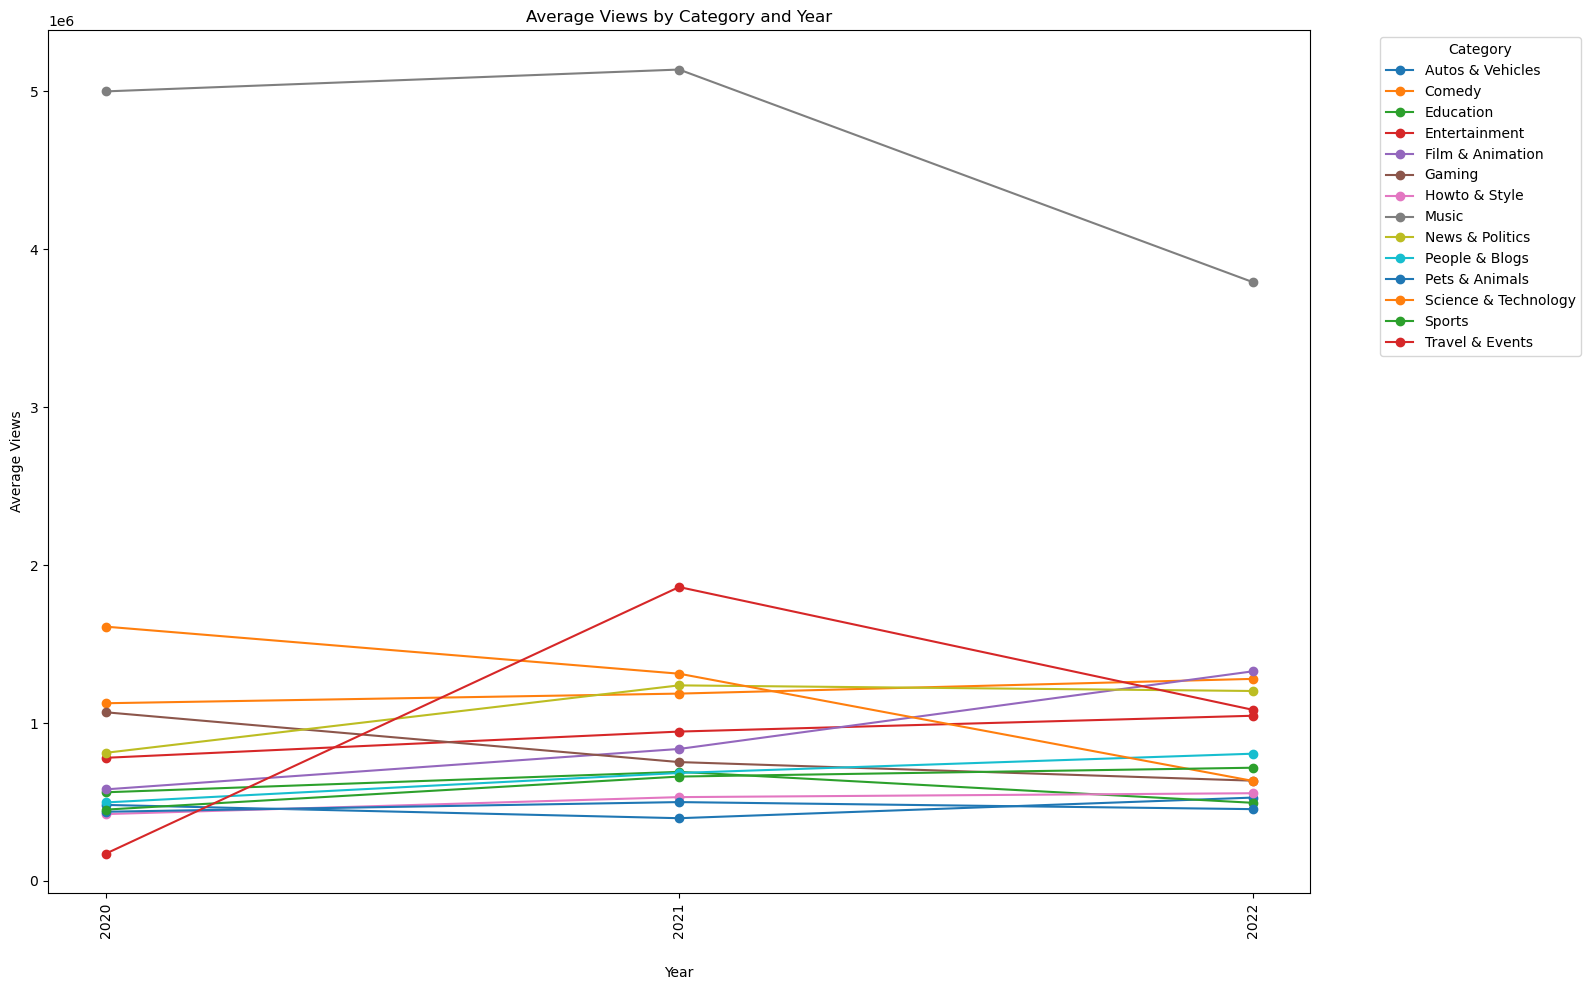

In [67]:
# Group the filtered data by category, year, and calculate the average views
category_year_metrics = cleaned_data.groupby(['category', 'year'])['view_count'].mean().reset_index()

# Pivot the data to have categories as columns and years as rows
pivot_table = category_year_metrics.pivot(index='year', columns='category', values='view_count')

# Plot the line graph
fig, ax = plt.subplots(figsize=(16, 10))  # Increase the figure size

pivot_table.plot(kind='line', marker='o', ax=ax)

# Move the legends outside the graph
ax.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')

# Set labels and title
ax.set_xlabel('Year', labelpad=20)  # Add padding to the x-axis label
ax.set_ylabel('Average Views')
ax.set_title('Average Views by Category and Year')

# Set and rotate the x-axis labels vertically
plt.xticks(rotation=90)
years = np.arange(2020, 2023)
ax.set_xticks(years)

plt.tight_layout()

# Save the plot as an image with transparent background
plt.show



<function matplotlib.pyplot.show(close=None, block=None)>

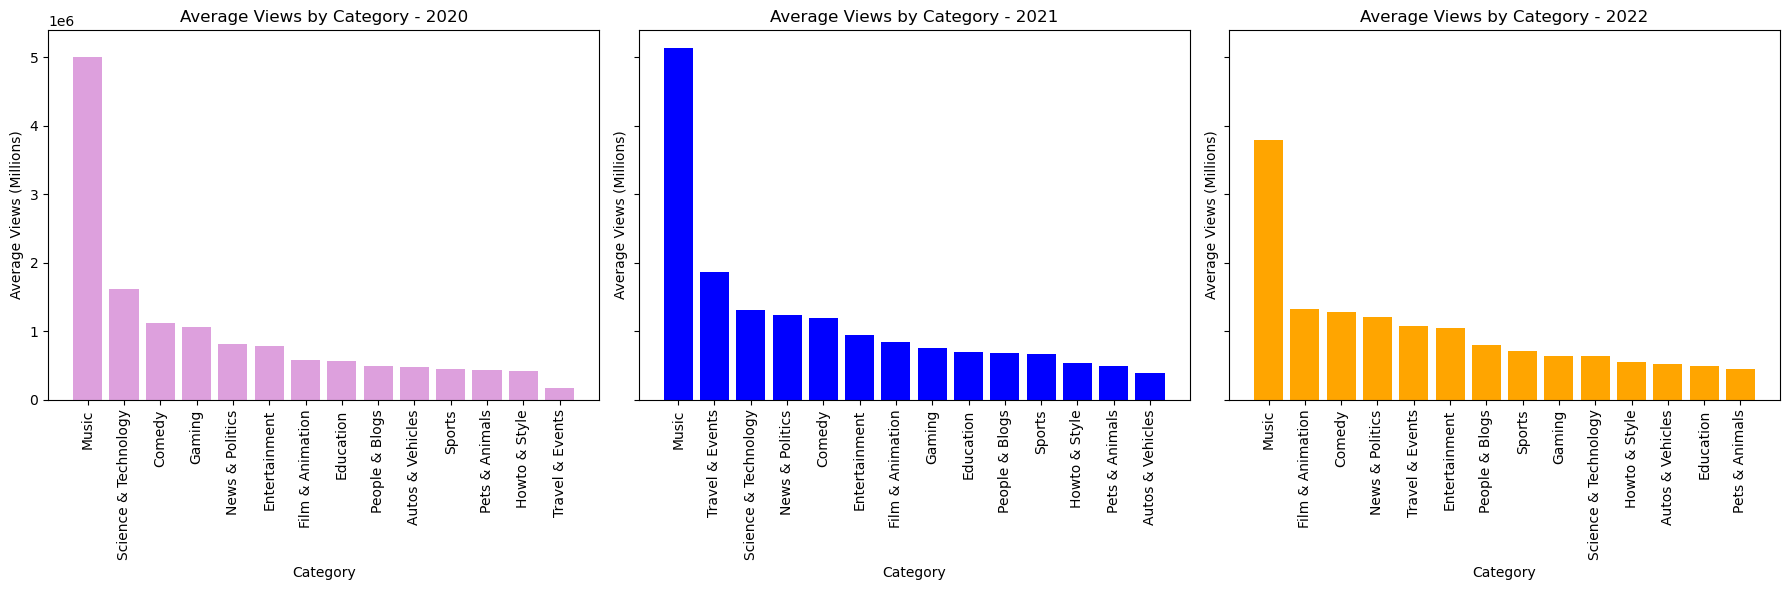

In [74]:
# Group the filtered data by category, year, and calculate the average views
category_year_metrics = cleaned_data.groupby(['category', 'year'])['view_count'].mean().reset_index()

# Filter the data for the years 2020, 2021, and 2022
filtered_data = category_year_metrics[category_year_metrics['year'].isin([2020, 2021, 2022])]

# Pivot the data to have years as columns and categories as rows
pivot_table = filtered_data.pivot(index='category', columns='year', values='view_count')

# Sort the pivot table values in descending order for each year
pivot_table.sort_values(by=2020, ascending=False, inplace=True)
pivot_table.sort_values(by=2021, ascending=False, inplace=True)
pivot_table.sort_values(by=2022, ascending=False, inplace=True)

# Define colors for the bar graphs
colors = ['plum', 'blue', 'orange']

# Plot the bar graphs
fig, axs = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

for i, year in enumerate([2020, 2021, 2022]):
    ax = axs[i]
    categories = pivot_table.index
    view_counts = pivot_table[year]
    sorted_indices = view_counts.argsort()[::-1]  # Sort indices in descending order
    sorted_view_counts = view_counts.iloc[sorted_indices]
    sorted_categories = categories[sorted_indices]
    ax.bar(sorted_categories, sorted_view_counts, color=colors[i])

    # Set labels and title for each graph
    ax.set_xlabel('Category')
    ax.set_ylabel('Average Views (Millions)')
    ax.set_title(f'Average Views by Category - {year}')
    ax.tick_params(axis='x', rotation=90)  # Rotate x-axis labels vertically

plt.tight_layout()

plt.show



### Analysis 
The bar graphs provide a clear visual representation of the average view counts for different categories over the three-year period. The consistent trend of the Music category dominating in average view count across all three years is easily noticeable. This suggests that the Music category is highly popular among Japanese viewers, consistently attracting a larger audience compared to other categories.

Moving on to the line graph, it adds an additional layer of insight. It reveals a specific pattern within the Music category's average view count over time. While the Music category maintains its position as the most viewed category throughout the three years, there is a notable drop in average view count from 2021 to 2022. This decline might indicate a potential shift in viewer preferences or external factors influencing viewership.

Despite the decrease in average view count from 2021 to 2022, the Music category still maintains a substantial lead compared to other categories. This further emphasizes the enduring popularity and strong viewer engagement with music-related content on YouTube.

In summary, the combination of bar graphs and a line graph allows us to analyze and compare the average view counts of different categories over time. It highlights the consistent dominance of the Music category and provides insights into potential shifts in viewership patterns.


### Question 2: What are the most popular genres ((Over the period spanning from 2020 to 2022)?

In [66]:
# Count the categories in the cleaned_data dataframe
categories = cleaned_data['category'].value_counts()

# Create a pie chart
fig = px.pie(categories, 
             values=categories.values,
             names=categories.index,
             title="Categories of YouTube Channels",
             template='presentation',
             hole=0.4,
             labels={'label': 'Category', 'value': 'Count'}
            )

# Configure text and hover properties
fig.update_traces(textposition='inside', 
                  textfont_size=10, 
                  textinfo='percent+label', 
                  hovertemplate='<b>%{label}</b><br>Count: %{value}',
                  insidetextorientation='radial')


fig.show()


In [30]:
# calculate average engagement by category
viewsByCategory = cleaned_data.groupby(['category'])['view_count'].mean()
likesByCategory = cleaned_data.groupby(['category'])['likes'].mean()
commentsByCategory = cleaned_data.groupby(['category'])['comment_count'].mean()

<function matplotlib.pyplot.show(close=None, block=None)>

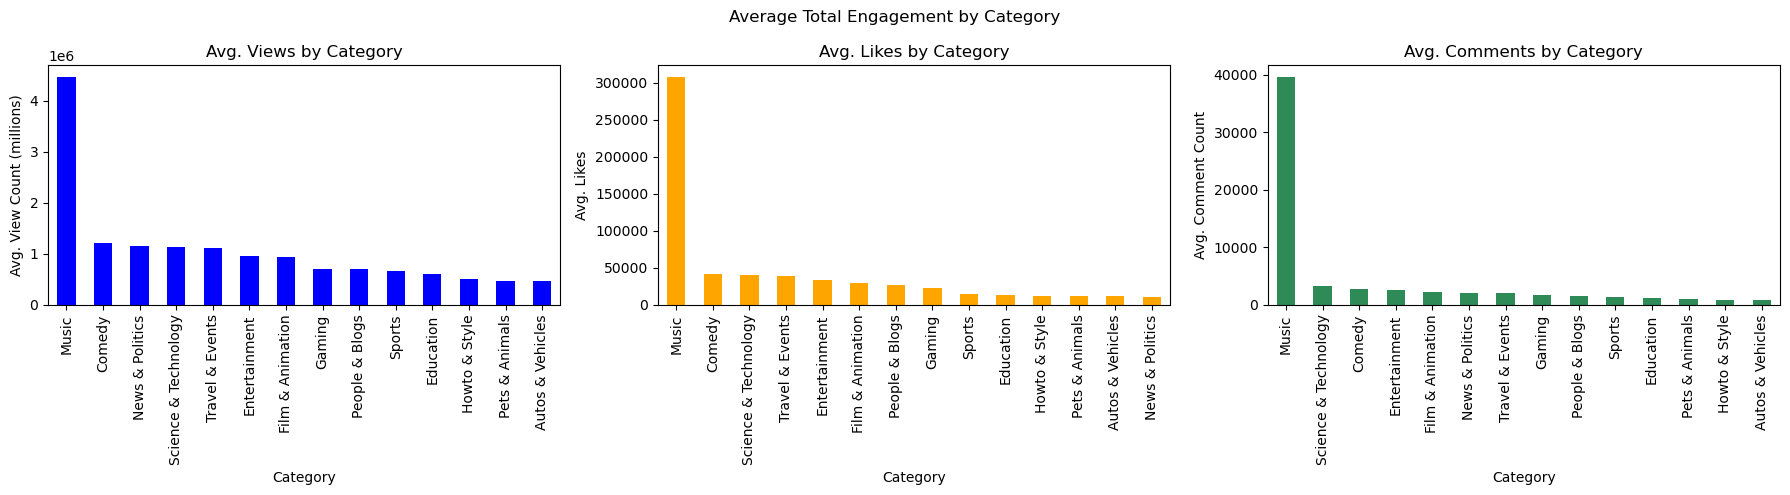

In [70]:
# Sort the data by 'view_count' in descending order
viewsByCategory_sorted = viewsByCategory.sort_values(ascending=False)

# Sort the data by 'likes' in descending order
likesByCategory_sorted = likesByCategory.sort_values(ascending=False)

# Sort the data by 'comment_count' in descending order
commentsByCategory_sorted = commentsByCategory.sort_values(ascending=False)

# Plot the data from the previous cell
fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
fig.suptitle("Average Total Engagement by Category")
fig.set_figheight(5)
fig.set_figwidth(18)

viewsByCategory_sorted.plot(kind='bar', title='Avg. Views by Category', ylabel='Avg. View Count (millions)', xlabel='Category', ax=ax1, color='blue')
likesByCategory_sorted.plot(kind='bar', title='Avg. Likes by Category', ylabel='Avg. Likes', xlabel='Category', ax=ax2, color='orange')
commentsByCategory_sorted.plot(kind='bar', title='Avg. Comments by Category', ylabel='Avg. Comment Count', xlabel='Category', ax=ax3, color='seagreen')

# Rotate x-axis labels vertically
ax1.tick_params(axis='x', rotation=90)
ax2.tick_params(axis='x', rotation=90)
ax3.tick_params(axis='x', rotation=90)

plt.tight_layout()

plt.show


### Analysis 

The pie chart provides valuable insights into the most popular categories of YouTube videos in Japan during the years 2020-2022. It reveals that Entertainment is the leading category, representing 33.1% of the videos on the trending page. This indicates a strong interest in entertaining content among Japanese viewers. Following Entertainment, the next most popular categories are gaming, people and blogs, music, and sports. This information helps us understand the content preferences and consumption patterns of Japanese YouTube users.

When we shift our focus to the average views, likes, and comments by category from 2020 to 2022, an intriguing pattern emerges. Despite being the fourth most frequently uploaded category, Music maintains its dominance in terms of average view count, likes, and comments. This finding highlights the immense popularity of music-related content among Japanese viewers. Despite the availability of various categories, viewers consistently engage with and show their appreciation for music videos, resulting in higher average view counts, likes, and comments compared to other categories.

This pattern suggests that music has a unique appeal and a dedicated fan base in Japan. It resonates strongly with viewers, evoking emotional connections and fostering engagement. The enduring popularity of music videos in terms of views, likes, and comments solidifies its status as a preferred choice among Japanese YouTube users.

Overall, the combination of the pie chart and analysis of average views, likes, and comments by category provides valuable insights into the preferences and popularity of YouTube content in Japan. It emphasizes the strong influence of the Music category, both in terms of viewership and engagement, further solidifying its position as a dominant and favored category among Japanese viewers.


### Question 3: Is there a correlation between the time of video publication and the number of views it receives? (Over the period spanning from 2020 to 2022)

<function matplotlib.pyplot.show(close=None, block=None)>

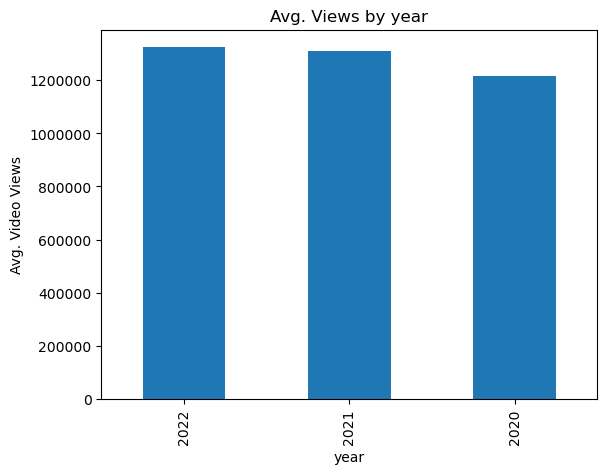

In [71]:
# month of the Year
viewsByYear = cleaned_data.groupby(['year'])['view_count'].mean()
viewsByYear = viewsByYear.sort_values(ascending=False)

plt.ticklabel_format(style='plain')
viewsByYear.plot(kind = 'bar', title='Avg. Views by year', ylabel = 'Avg. Video Views', xlabel='year');

plt.show


<function matplotlib.pyplot.show(close=None, block=None)>

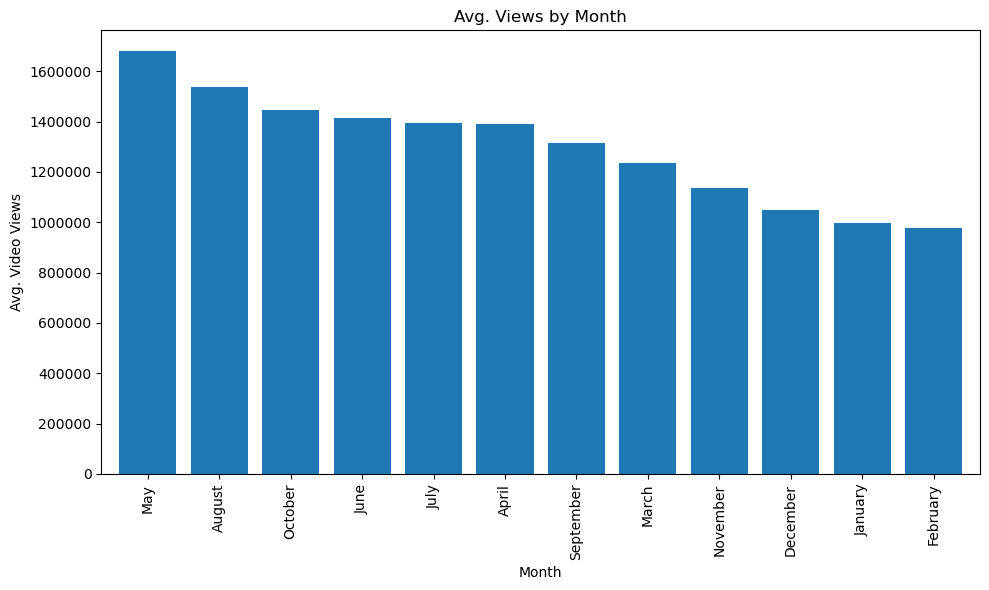

In [72]:
# month of the year
viewsByMonth = cleaned_data.groupby(['month'])['view_count'].mean()
viewsByMonth = viewsByMonth.sort_values(ascending=False)

plt.figure(figsize=(10, 6))  # Adjust the figure size

plt.ticklabel_format(style='plain')

# Plot the bar graph with increased spacing between bars
viewsByMonth.plot(kind='bar', title='Avg. Views by Month', ylabel='Avg. Video Views', xlabel='Month', width=0.8)

plt.tight_layout()  # Adjust the layout to prevent cut-off labels

plt.show



<function matplotlib.pyplot.show(close=None, block=None)>

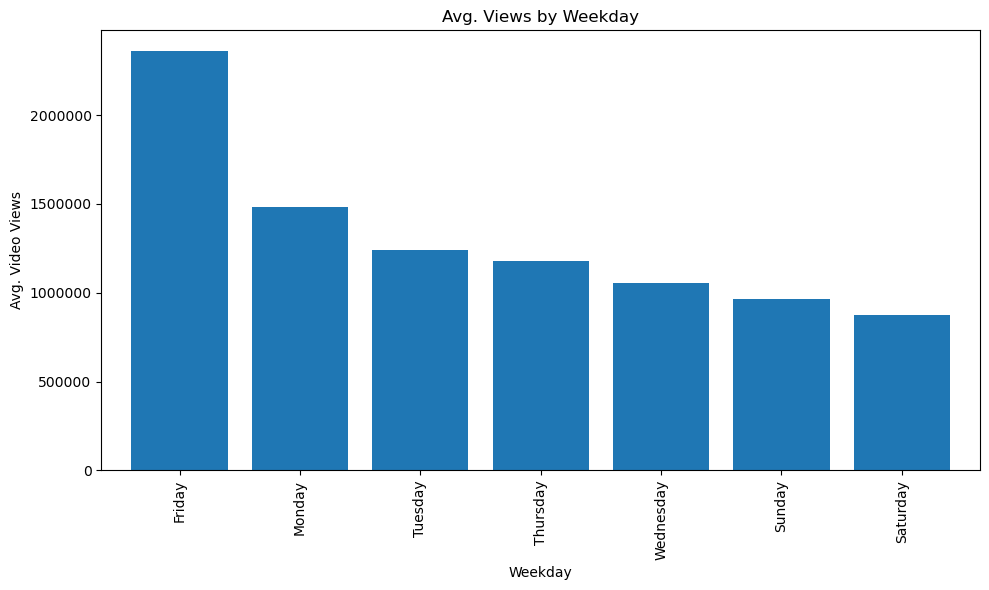

In [73]:
# month of the weekday
viewsByWeekday = cleaned_data.groupby(['weekday'])['view_count'].mean()
viewsByWeekday = viewsByWeekday.sort_values(ascending=False)

plt.figure(figsize=(10, 6))  # Adjust the figure size

plt.ticklabel_format(style='plain')

# Plot the bar graph with increased spacing between bars
viewsByWeekday.plot(kind='bar', title='Avg. Views by Weekday', ylabel='Avg. Video Views', xlabel='Weekday', width=0.8)

plt.tight_layout()  # Adjust the layout to prevent cut-off labels

plt.show


### Analysis

In the context of Japanese videos uploaded between 2020 and 2022, an interesting trend emerges when analyzing the viewing patterns based on the month and the day of the week. It appears that videos uploaded in the month of May tend to receive higher view counts compared to other months, while videos uploaded on Fridays consistently garner more views than videos uploaded on other weekdays.

One possible explanation for this trend is the influence of seasonal trends and content releases. May, being a spring month, often marks the beginning of a vibrant season with various cultural and entertainment events taking place in Japan. This includes the release of highly anticipated movies, music albums, and other forms of entertainment content. As people eagerly await new releases during this period, the increased viewership of videos uploaded in May could be attributed to the excitement surrounding these seasonal trends.

The popularity of May and Fridays as periods for video uploads aligns with the possibility of significant content releases in Japan. Movie studios, music labels, and other entertainment industries often strategically schedule their releases during these times to maximize their impact and capitalize on the heightened interest and engagement of the audience. Therefore, it is likely that videos uploaded in May and on Fridays are associated with the release of highly anticipated movies, music videos, or other forms of entertainment content, driving higher view counts.

Overall, the observed increase in views for videos uploaded in May and on Fridays in Japan can be attributed to the combined effects of seasonal trends, cultural events, and the strategic timing of content releases. The excitement surrounding these periods creates a heightened level of engagement and viewership, making May and Fridays particularly favorable for video uploads.